In [56]:
import pandas as pd
import numpy as np
import geopandas as gpd    #Geopandas is used to working woth geospatial data 
import matplotlib.pyplot as plt
import seaborn as sns
import folium  # used to create web maps from the data
import plotly
import plotly.offline as py
import plotly.graph_objs as go
import plotly_express as px

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [57]:
df=pd.read_csv("worldcities.csv")

In [58]:
df


,UserName,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,User1,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37732000.0,1392685764
1,User2,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000.0,1360771077
2,User3,Delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,admin,32226000.0,1356872604
3,User4,Guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,admin,26940000.0,1156237133
4,User5,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,admin,24973000.0,1356226629
...,...,...,...,...,...,...,...,...,...,...,...,...
47863,User47864,Munha-dong,Munha-dong,39.3813,127.2517,"Korea, North",KP,PRK,Kangwŏn,NaN,NaN,1408979215
47864,User47865,Sil-li,Sil-li,39.4880,125.4640,"Korea, North",KP,PRK,P’yŏngnam,NaN,NaN,1408767958
47865,User47866,Muan,Muan,34.9897,126.4714,"Korea, South",KR,KOR,Jeonnam,admin,NaN,1410001061
47866,User47867,Hongseong,Hongseong,36.6009,126.6650,"Korea, South",KR,KOR,Chungnam,admin,NaN,1410822139


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47868 entries, 0 to 47867
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   UserName    47868 non-null  object 
 1   city        47868 non-null  object 
 2   city_ascii  47867 non-null  object 
 3   lat         47868 non-null  float64
 4   lng         47868 non-null  float64
 5   country     47868 non-null  object 
 6   iso2        47835 non-null  object 
 7   iso3        47868 non-null  object 
 8   admin_name  47671 non-null  object 
 9   capital     13023 non-null  object 
 10  population  47656 non-null  float64
 11  id          47868 non-null  int64  
dtypes: float64(3), int64(1), object(8)
memory usage: 4.4+ MB


In [60]:
df.describe()

,lat,lng,population,id
count,47868.000000,47868.000000,4.765600e+04,4.786800e+04
mean,25.534513,16.331353,1.089227e+05,1.449074e+09
std,23.000405,70.298580,6.857896e+05,2.611200e+08
min,-54.933300,-179.600000,0.000000e+00,1.004003e+09
25%,12.319175,-43.879350,1.220475e+04,1.250640e+09
50%,31.309600,14.663500,2.091550e+04,1.380480e+09
75%,42.810675,77.020000,4.690000e+04,1.704214e+09
max,81.716600,179.370300,3.773200e+07,1.934976e+09


In [61]:
df.shape

(47868, 12)

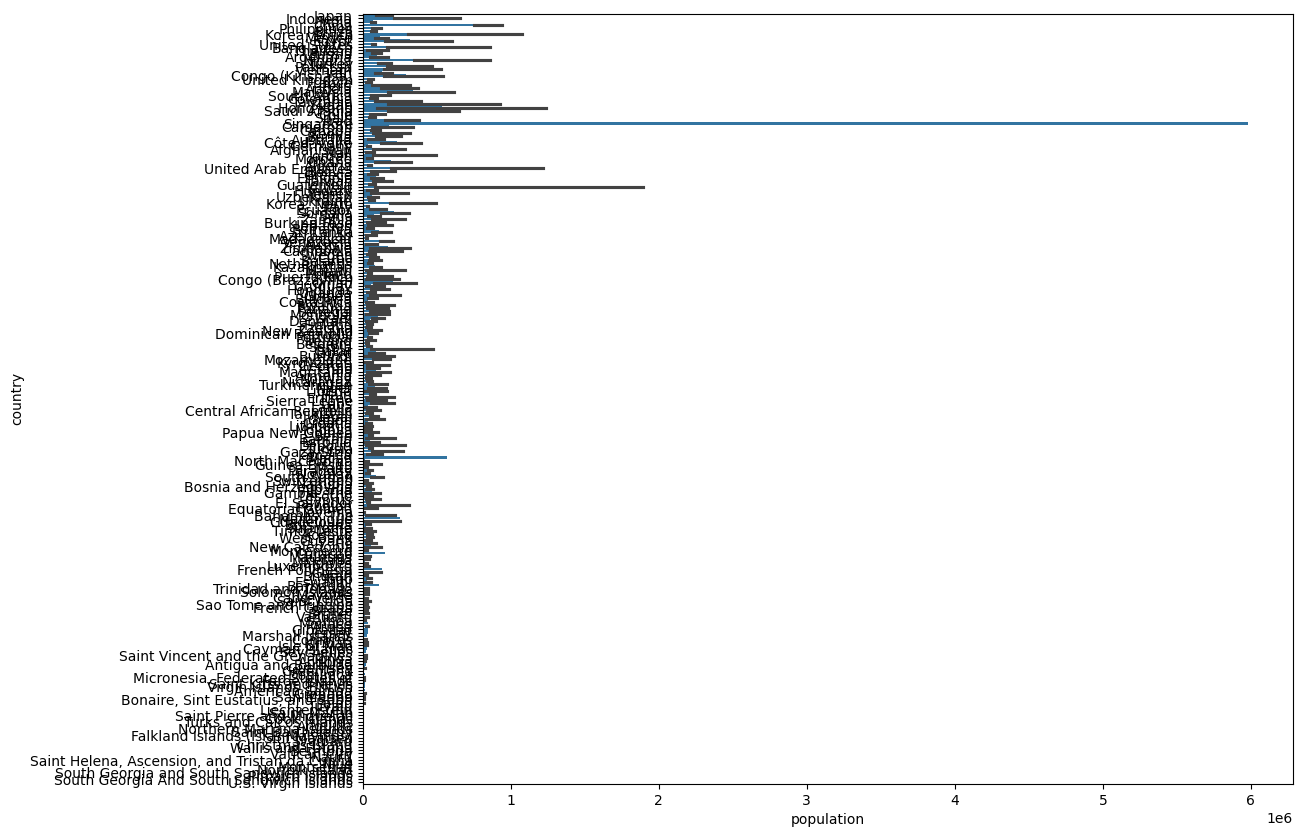

In [62]:
fig,ax=plt.subplots(figsize=(12,10))
sns.barplot(x='population',y='country',data=df,ax=ax)
plt.savefig("otp")
plt.show()

In [63]:
px.scatter_mapbox(df, lat="lat", lon="lng", color="population",
                   size_max=30, zoom=3, width=1200, height=800)

In [64]:
coords=df[['lat','lng']]

distortion=[]
K=range(1,25)

for k in K:
    Kmean_model=KMeans(n_clusters=k)
    Kmean_model=Kmean_model.fit(coords)
    distortion.append(Kmean_model.inertia_)


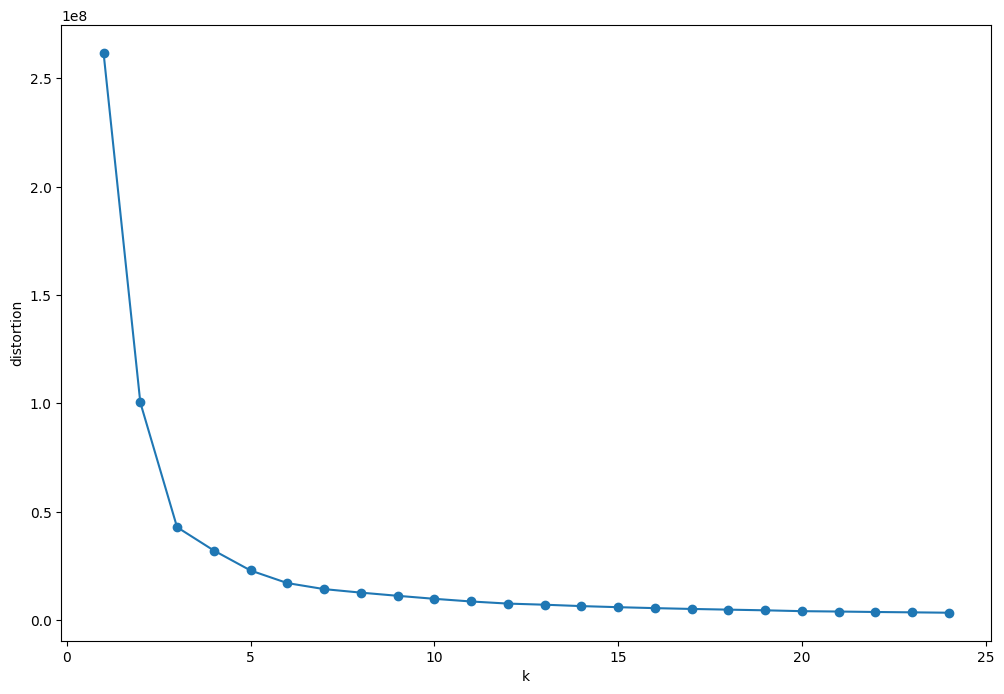

In [65]:
fig,ax=plt.subplots(figsize=(12,8))
plt.plot(K,distortion,marker='o')
plt.xlabel('k')
plt.ylabel('distortion')
plt.show()


In [66]:
kmeans=KMeans(n_clusters=6,init='k-means++')
kmeans.fit(coords)
y=kmeans.labels_
print("K=5","silhouette_score: ",silhouette_score(coords,y,metric='euclidean'))

K=5 silhouette_score:  0.5739176592471172


In [67]:
df['cluster']=kmeans.predict(df[['lat','lng']])
df.head()

,UserName,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id,cluster
0,User1,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37732000.0,1392685764,3
1,User2,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000.0,1360771077,3
2,User3,Delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,admin,32226000.0,1356872604,5
3,User4,Guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,admin,26940000.0,1156237133,3
4,User5,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,admin,24973000.0,1356226629,5


In [68]:
import haversine as hs
from haversine import Unit

In [69]:
def calculate_distance(lat1,lng1,lat2,lng2):
    loc1=(lat1,lng1)
    loc2=(lat2,lng2)
    result=hs.haversine(loc1,loc2,unit=Unit.KILOMETERS)
    return result


In [70]:
def recommend_user(df,lat,lon,n):
    cluster=kmeans.predict(np.array([lat,lon]).reshape(1,-1))[0]
    print(cluster)    
    df2=df[df['cluster']==cluster].iloc[0:n][['UserName','city','lat','lng']]
    df2['distance']=df2.apply(lambda row: calculate_distance(lat,lon,row['lat'],row['lng']),axis=1)
    df2.sort_values(by='distance',inplace=True)
    return df2[['UserName','city','distance']]
    

In [71]:
recommend_user(df,15.2993,74.1240,15)

5


,UserName,city,distance
59,User60,Pune,359.286145
4,User5,Mumbai,440.333037
22,User23,Bangalore,454.264377
39,User40,Hyderābād,517.774540
81,User82,Sūrat,666.926089
29,User30,Chennai,707.359626
61,User62,Ahmedabad,874.096893
21,User22,Karachi,1296.262237
2,User3,Delhi,1514.122428
14,User15,Kolkāta,1700.883954


In [72]:
import pymongo
client=pymongo.MongoClient("mongodb://localhost:27017")
db=client.Location_based_friend_recommendation
collection=db.Location_data

In [73]:
docs=collection.find()

In [74]:
def calculate_distance(lat1,lng1,lat2,lng2):
    loc1=(lat1,lng1)
    loc2=(lat2,lng2)
    result=hs.haversine(loc1,loc2,unit=Unit.KILOMETERS)
    return result


In [75]:
data=[]

In [76]:
for doc in collection.find():
    _id=doc['_id']
    Username=doc['UserName']
    City=doc['city']
    lat=doc['lat']
    lng=doc['lng']
    data.append([_id,Username,City,lat,lng])
    

In [77]:
data_array=np.array(data)

In [78]:
data2=pd.DataFrame(data_array,columns=['_id','UserName','City','lat','lng'])

In [79]:
coords

,lat,lng
0,35.6897,139.6922
1,-6.1750,106.8275
2,28.6100,77.2300
3,23.1300,113.2600
4,19.0761,72.8775
...,...,...
47863,39.3813,127.2517
47864,39.4880,125.4640
47865,34.9897,126.4714
47866,36.6009,126.6650


In [80]:
def recommend_user(lat,lon,n):
    cluster=kmeans.predict(np.array([lat,lon]).reshape(1,-1))[0]
    
    

In [96]:
def recommend_user(df,lat,lon,n):
    cluster=kmeans.predict(np.array([lat,lon]).reshape(1,-1))[0]
    print(cluster)    
    df2=df[df['cluster']==cluster].iloc[0:n][['_id','UserName','city','lat','lng']]
    df2['distance']=df2.apply(lambda row: calculate_distance(lat,lon,row['lat'],row['lng']),axis=1)
    df2.sort_values(by='distance',inplace=True)
    return df2[['_id','UserName','City','distance']]
    

In [82]:
coords

,lat,lng
0,35.6897,139.6922
1,-6.1750,106.8275
2,28.6100,77.2300
3,23.1300,113.2600
4,19.0761,72.8775
...,...,...
47863,39.3813,127.2517
47864,39.4880,125.4640
47865,34.9897,126.4714
47866,36.6009,126.6650


In [83]:
def recommend_user2(df,lat,lon):
    df['distance']=df.apply(lambda row: calculate_distance(lat,lon,row['lat'],row['lng']),axis=1)
    df.sort_values(by='distance',inplace=True)
    return df[['_id','UserName','City','distance']]
    

In [103]:
recommend_user2(data2,19.0761,72.8775)

,_id,UserName,City,distance
4,6608f98aba8f7c96faf943f2,User5,Mumbai,0.000000
433,6608f98aba8f7c96faf9459f,User434,Thāne,16.741976
17372,6608f98bba8f7c96faf987ca,User17373,Uran,22.052896
938,6608f98aba8f7c96faf94798,User939,Bhayandar,23.959329
2231,6608f98aba8f7c96faf94ca5,User2232,Panvel,26.457687
...,...,...,...,...
46504,6608f98cba8f7c96faf9f996,User46505,Puerto Baquerizo Moreno,17235.329208
37823,6608f98cba8f7c96faf9d7ad,User37824,Santa Cruz,17259.070401
34735,6608f98cba8f7c96faf9cb9d,User34736,Puerto Ayora,17274.903419
47113,6608f98cba8f7c96faf9fbf7,User47114,Puerto Villamil,17339.398004


In [92]:
kmeans=KMeans(n_clusters=6,init='k-means++')
kmeans.fit(coords)
y=kmeans.labels_
print("K=5","silhouette_score: ",silhouette_score(coords,y,metric='euclidean'))
data2['cluster']=kmeans.predict(data2[['lat','lng']])
data2.head()

K=5 silhouette_score:  0.5739395570008426


,_id,UserName,City,lat,lng,distance,cluster
47865,6608f98cba8f7c96faf9fee7,User47866,Muan,34.9897,126.4714,0.000000,1
6576,6608f98aba8f7c96faf95d9e,User6577,Naju,35.0333,126.7167,22.860168,1
3100,6608f98aba8f7c96faf9500a,User3101,Mokpo,34.7589,126.38,26.984327,1
523,6608f98aba8f7c96faf945f9,User524,Gwangju,35.1653,126.8486,39.489964,1
5629,6608f98aba8f7c96faf959eb,User5630,Jeonghae,35.5667,126.85,72.784203,1


In [101]:
def recommend_user3(df,lat,lon,n):
    cluster=kmeans.predict(np.array([lat,lon]).reshape(1,-1))[0]
    print(cluster)    
    df2=df[df['cluster']==cluster].iloc[0:n][['_id','UserName','City','lat','lng']]
    df2['distance']=df2.apply(lambda row: calculate_distance(lat,lon,row['lat'],row['lng']),axis=1)
    df2.sort_values(by='distance',inplace=True)
    return df2[['_id','UserName','City','distance']]
    

In [104]:
recommend_user3(data2,19.0761,72.8775,10)

5


,_id,UserName,City,distance
4,6608f98aba8f7c96faf943f2,User5,Mumbai,0.000000
433,6608f98aba8f7c96faf9459f,User434,Thāne,16.741976
17372,6608f98bba8f7c96faf987ca,User17373,Uran,22.052896
938,6608f98aba8f7c96faf94798,User939,Bhayandar,23.959329
2231,6608f98aba8f7c96faf94ca5,User2232,Panvel,26.457687
1050,6608f98aba8f7c96faf94808,User1051,Bhiwandi,31.330809
3657,6608f98aba8f7c96faf95237,User3658,Kalamboli,32.054412
1458,6608f98aba8f7c96faf949a0,User1459,Ulhāsnagar,32.792957
623,6608f98aba8f7c96faf9465d,User624,Vasai-Virar,32.793683
614,6608f98aba8f7c96faf94654,User615,Kalyān,35.446365


In [ ]:
# docs=collection.find()
# for doc in docs:
#     doc['lat']
#     kmeans=KMeans(n_clusters=6,init='k-means++')
#     kmeans.fit(coords)

In [ ]:
client.close()

In [ ]:
import warnings

warnings.filterwarnings("ignore")


In [ ]:
import pymongo
client=pymongo.MongoClient("mongodb://localhost:27017")
db=client.Location_based_friend_recommendation
collection=db.Location_data
data=[]
for doc in collection.find():
    _id=doc['_id']
    Username=doc['UserName']
    City=doc['city']
    lat=doc['lat']
    lng=doc['lng']
    data.append([_id,Username,City,lat,lng])
data_array=np.array(data)
client.close()
dataframe=pd.DataFrame(data_array,columns=['_id','UserName','City','lat','lng'])
coordinates=dataframe[['lat','lng']]
kmeans=KMeans(n_clusters=10,init='k-means++')
kmeans.fit(coordinates)
dataframe['cluster']=kmeans.predict(dataframe[['lat','lng']])




In [ ]:
kmeans

KMeans(n_clusters=10)

In [ ]:
import pymongo
def dataframe_mongo(link,db_name,collection_name):
    client=pymongo.MongoClient(link)
    db=client.db_name 
    collection=db.collection_name 
    data=[]
    for doc in collection.find():
        _id=doc['_id']
        Username=doc['UserName']
        City=doc['city']
        lat=doc['lat']
        lng=doc['lng']
        data.append([_id,Username,City,lat,lng])
    data_array=np.array(data)
    client.close()
    dataframe=pd.DataFrame(data_array,columns=['_id','UserName','City','lat','lng'])
    coordinates=dataframe[['lat','lng']]
    kmeans=KMeans(n_clusters=10,init='k-means++')
    kmeans.fit(coordinates)
    dataframe['cluster']=kmeans.predict(dataframe[['lat','lng']])
    return dataframe




In [ ]:
def recommend_user(df,lat,lon,n):
    cluster=kmeans.predict(np.array([lat,lon]).reshape(1,-1))[0]
    print(cluster)    
    df2=df[df['cluster']==cluster][['_id','UserName','City','lat','lng']]
    df2['distance']=df2.apply(lambda row: calculate_distance(lat,lon,row['lat'],row['lng']),axis=1)
    df2.sort_values(by='distance',inplace=True)
    return df2[['_id','UserName','City','distance']].iloc[0:n]
    

In [ ]:
recommend_user(dataframe,26.8467,80.9462,10)

2


,_id,UserName,City,distance
223,6608f98aba8f7c96faf944cd,User224,Lucknow,0.526091
30567,6608f98bba8f7c96faf9bb55,User30568,Hasanganj,28.395634
36956,6608f98cba8f7c96faf9d44a,User36957,Samesi,30.085406
15651,6608f98bba8f7c96faf98111,User15652,Zaidpur,38.124940
20947,6608f98bba8f7c96faf995c1,User20948,Purwā,45.025725
30007,6608f98bba8f7c96faf9b925,User30008,Maurānwān,46.799832
20613,6608f98bba8f7c96faf99473,User20614,Sidhaulī,49.535655
9867,6608f98aba8f7c96faf96a79,User9868,Sandīla,49.569830
11136,6608f98bba8f7c96faf96f6e,User11137,Mahmudābād,53.261169
3648,6608f98aba8f7c96faf9522e,User3649,Unnāo,56.055643


In [ ]:
import pickle

In [ ]:
def save_model():
    with open("model_pkl",'wb') as f:
        pickle.dump(kmeans,f)

In [ ]:
def open_model():
    with open('model_pkl' , 'rb') as f:
        model = pickle.load(f)
        return model


In [ ]:
def dataframe_mongo(link,db_name,collection_name):
    client=pymongo.MongoClient(link)
    db=client[db_name]
    collection=db[collection_name]
    data=[]
    for doc in collection.find():
        _id=doc['_id']
        Username=doc['UserName']
        City=doc['city']
        lat=doc['lat']
        lng=doc['lng']
        data.append([_id,Username,City,lat,lng])
    data_array=np.array(data)
    client.close()
    dataframe=pd.DataFrame(data_array,columns=['_id','UserName','City','lat','lng'])
    coordinates=dataframe[['lat','lng']]
    kmeans=KMeans(n_clusters=10,init='k-means++')
    kmeans.fit(coordinates)
    dataframe['cluster']=kmeans.labels_
    return dataframe,kmeans

In [ ]:
dataframe,kmeans=dataframe_mongo('mongodb://localhost:27017','Location_based_friend_recommendation','Location_data')


In [ ]:
dataframe

,_id,UserName,City,lat,lng,cluster
0,6608f98aba8f7c96faf943ee,User1,Tokyo,35.6897,139.6922,6
1,6608f98aba8f7c96faf943ef,User2,Jakarta,-6.175,106.8275,6
2,6608f98aba8f7c96faf943f0,User3,Delhi,28.61,77.23,1
3,6608f98aba8f7c96faf943f1,User4,Guangzhou,23.13,113.26,6
4,6608f98aba8f7c96faf943f2,User5,Mumbai,19.0761,72.8775,1
...,...,...,...,...,...,...
47863,6608f98cba8f7c96faf9fee5,User47864,Munha-dong,39.3813,127.2517,6
47864,6608f98cba8f7c96faf9fee6,User47865,Sil-li,39.488,125.464,6
47865,6608f98cba8f7c96faf9fee7,User47866,Muan,34.9897,126.4714,6
47866,6608f98cba8f7c96faf9fee8,User47867,Hongseong,36.6009,126.665,6
